<a href="https://colab.research.google.com/github/Manojkl/Machine-Learning/blob/master/Machine-Learning/Homework_05/Homework_AdaBoost_RandomForest_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: AdaBoost and Random Forest



###  Consider 'house_data.csv' dataset which includes homes sold between 06.2014 and 05.2015. Your task is to use AdaBoost  and Random Forest algorithms to predict the sales price of houses.

####  1) Data Preprocessing: 
a) study the dataset: what it contains, what are its features and what is the structure of data.  
b) check whether data contain null or missing values. What is the size of the data. What is the datatype of each feature/column. What are unique values of categorical variables etc.  
c)  check the correlation between the features and target values (house' prices). Maybe remove features which do not have much impack on the price. Use visualisation of the data for the better understanding of features.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import sklearn.model_selection as curves
from sklearn.preprocessing import StandardScaler

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
print('Data type of each feature')
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Data type of each feature


,dtype
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


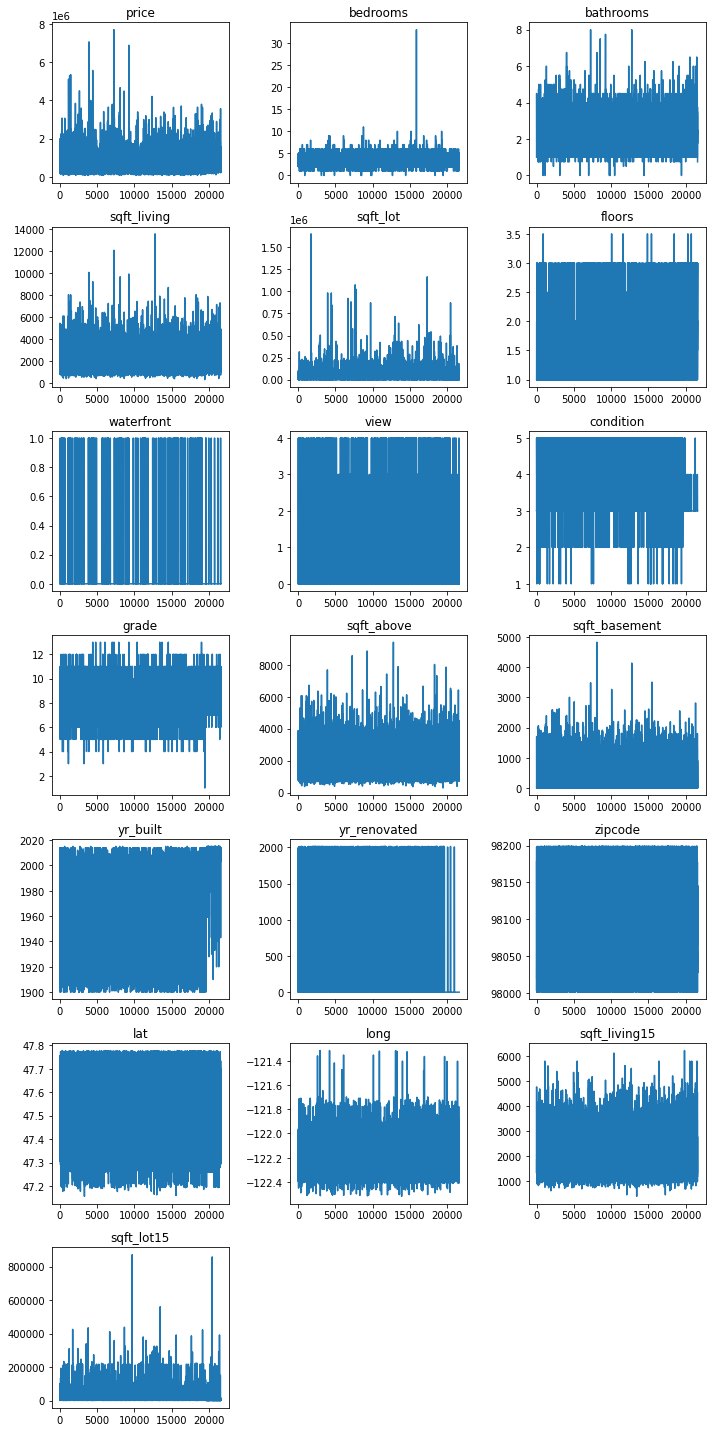

In [9]:
# Visualization of the features
data_plot = data.drop(['date', 'id'], axis=1)
# data =data_plot
iterator = 1
fig = plt.figure(figsize=(10,20))
feature_list = []
for header in data_plot:
    feature_list.append(header)
    x = np.linspace(0, len(data_plot[header]), len(data_plot[header]))
    ax = fig.add_subplot(7, 3, iterator)
    ax.plot(x, data_plot[header])
    ax.set_title(header)
    iterator+=1
plt.tight_layout()
plt.show()

### Feature removal -
* After visualizing all the features it is observed data out of 21 features only only 7 feature are varying very much and they are 
    * Bathrooms
    * sqft_living
    * sqft_lot
    * sqft above
    * long
    * sqft_living15
    * sqft_lot15

The other left features will be removed from the data set to reduce the computation.

In [10]:
target = pd.DataFrame(data['price'])
df = data.drop(['id', 'date', 'price', 'bedrooms','floors', 
               'waterfront',  'view',  'condition',  'grade', 
               'yr_built',  'yr_renovated',  'zipcode', 'lat', 'sqft_basement'], axis=1)
df

,bathrooms,sqft_living,sqft_lot,sqft_above,long,sqft_living15,sqft_lot15
0,1.00,1180,5650,1180,-122.257,1340,5650
1,2.25,2570,7242,2170,-122.319,1690,7639
2,1.00,770,10000,770,-122.233,2720,8062
3,3.00,1960,5000,1050,-122.393,1360,5000
4,2.00,1680,8080,1680,-122.045,1800,7503
...,...,...,...,...,...,...,...
21608,2.50,1530,1131,1530,-122.346,1530,1509
21609,2.50,2310,5813,2310,-122.362,1830,7200
21610,0.75,1020,1350,1020,-122.299,1020,2007
21611,2.50,1600,2388,1600,-122.069,1410,1287


In [0]:
target = pd.DataFrame(data['price'])
data_common = data.copy()
data_common = data_common.drop(['date', 'id','price'], axis=1)

####  2) Apply machine learning method  
a) split the data into training and testing sets  
b) train the model for AdaBoost and Random Forest
    - for AdaBoost use different weak classifiers
    - for Random Forest vary the sizes of trees

####  3)  Evaluate and compare the results.
a) output the confusion matrix  
b) plot the complexity curve   
c) compare the accuracy of both methods  
d) analyse training time of each model 

In [0]:
def adaboost(data,target):
    train_data, test_data, train_label, test_label = train_test_split(data, target)
    start = time()
    
    estimators = np.arange(10, 200, 20)
    scores = []
    variance_score = []
    for n in estimators:
        ada=AdaBoostRegressor(n_estimators=n, learning_rate=0.2,loss='exponential').fit(train_data, train_label.values.ravel())
        scores.append(ada.score(test_data,test_label))
        predict = ada.predict(test_data)
        variance_score.append(explained_variance_score(predict,test_label))
    end=time()
    train_time_ada=end-start
    plt.title("Effect of n_estimators")
    plt.xlabel("n_estimator")
    plt.ylabel("score")
    plt.grid()
    plt.plot(estimators, scores)
    
    return scores,variance_score,train_time_ada

Vairation of accuracy with number of parameters considering all features for Adaboost 


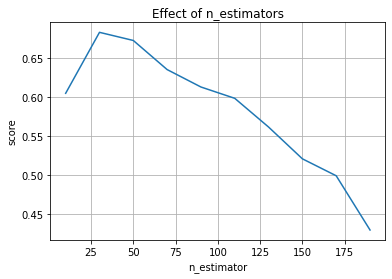

In [13]:
print("Vairation of accuracy with number of parameters considering all features for Adaboost ")
ada_accuracy, ada_variance_score, train_time_ada_all = adaboost(data_common,target)


In [0]:
# Taking only the prominent features
df = data_common.drop(['bedrooms','floors', 
               'waterfront',  'view',  'condition',  'grade', 
               'yr_built',  'yr_renovated',  'zipcode', 'lat', 'sqft_basement'], axis=1)

Vairation of accuracy with numbet of parameters considering 9 prominent features features for Adaboost 


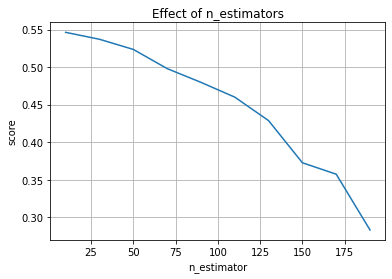

In [15]:
print("Vairation of accuracy with numbet of parameters considering 9 prominent features features for Adaboost ")

ada_accuracy, ada_variance_score, train_time_ada_9 = adaboost(df,target)

In [0]:
model = RandomForestRegressor(random_state=0)
def randomForest(data, labels):
    train_data, test_data, train_lebel, test_label = train_test_split(data, target)
    start = time()
    scaler = StandardScaler()
    scaler.fit(train_data)
    train_data = scaler.transform(train_data)
    test_data = scaler.transform(test_data)

    estimators = np.arange(10, 200, 20)
    scores = []
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(train_data, train_lebel.values.ravel())
        scores.append(model.score(test_data, test_label))
    end=time()
    train_time_random=end-start
    plt.title("Effect of n_estimators")
    plt.xlabel("n_estimator")
    plt.ylabel("score")
    plt.grid()
    plt.plot(estimators, scores)
    return scores, estimators, train_time_random

Accuracy with all features for random forest


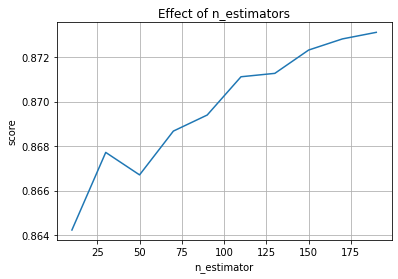

In [17]:
print('Accuracy with all features for random forest')
# df = data.drop(['id', 'date', 'price'], axis=1)
# print(type(data))
random_accuracy, random_variance_score, train_time_random_all = randomForest(data_common, target)

In [18]:
importance = list(model.feature_importances_)
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importance)]
feature_importance = sorted(feature_importance, key =lambda x:x[1], reverse=True)
['Variable: {:20} Importance: {}'.format(*pair) for pair in feature_importance]

['Variable: bathrooms            Importance: 0.31',
 'Variable: condition            Importance: 0.28',
 'Variable: zipcode              Importance: 0.16',
 'Variable: lat                  Importance: 0.07',
 'Variable: floors               Importance: 0.03',
 'Variable: sqft_basement        Importance: 0.03',
 'Variable: long                 Importance: 0.03',
 'Variable: grade                Importance: 0.02',
 'Variable: bedrooms             Importance: 0.01',
 'Variable: sqft_living          Importance: 0.01',
 'Variable: waterfront           Importance: 0.01',
 'Variable: sqft_above           Importance: 0.01',
 'Variable: yr_renovated         Importance: 0.01',
 'Variable: sqft_living15        Importance: 0.01',
 'Variable: price                Importance: 0.0',
 'Variable: sqft_lot             Importance: 0.0',
 'Variable: view                 Importance: 0.0',
 'Variable: yr_built             Importance: 0.0']

### Feature removal -
* After visualizing all the features it is observed data out of 21 features only only 9 feature are varying very much and they are 
    * Condition
    * bathrooms
    * zipcode
    * lat
    * sqft_basement
    * floors
    * long
    * grade
    * yr_renovated

The other left features will be removed from the data set to reduce the computation.

Accuracy with 9 prominent features for randomforest


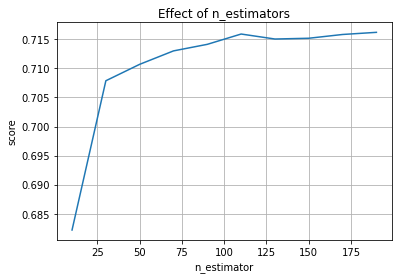

In [19]:
print('Accuracy with 9 prominent features for randomforest')
# df1 = data.drop(['id', 'date', 'price', 'sqft_living', 'waterfront', 'sqft_above',
#                  'sqft_living15', 'sqft_lot', 'view', 'yr_built'], axis=1)
random_accuracy, random_variance_score, train_time_random_9 = randomForest(df, target)

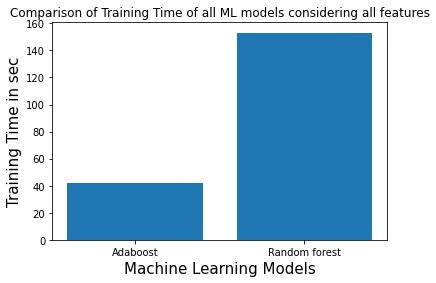

In [20]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Adaboost','Random forest']
Train_Time = [
    train_time_ada_all,
    train_time_random_all
    
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time in sec', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models considering all features')
plt.show()

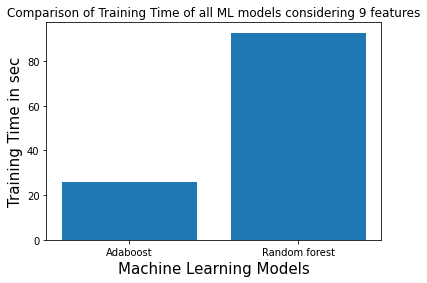

In [21]:
model = ['Adaboost','Random forest']
Train_Time = [
    train_time_ada_9,
    train_time_random_9
    
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time in sec', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models considering 9 features')
plt.show()

In [0]:
def ModelComplexity_adaboost(X, y):
    
    n_estimators = np.arange(1,200)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(AdaBoostRegressor(), X, y, \
        param_name = "n_estimators", param_range = n_estimators, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(7, 5))
    plt.title('Adaboost Complexity Performance')
    plt.plot(n_estimators, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(n_estimators, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(n_estimators, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(n_estimators, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    plt.legend(loc = 'lower right')
    plt.xlabel('Number of estimator')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.grid()
    plt.show()

 Considering all features


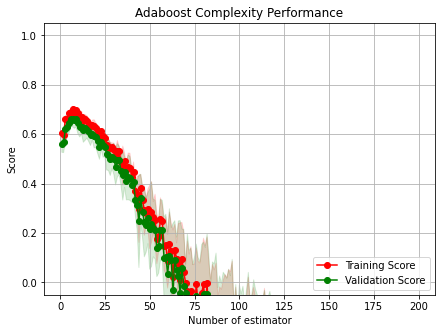

In [26]:
print(" Considering all features")
train_data, test_data, train_label, test_label = train_test_split(data_common, target)
ModelComplexity_adaboost(train_data, train_label.values.ravel())

 Considering 9 features


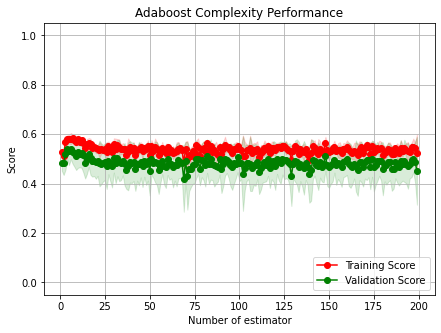

In [27]:
print(" Considering 9 features")
train_data, test_data, train_label, test_label = train_test_split(df, target)
ModelComplexity_adaboost(train_data, train_label.values.ravel())

In [0]:
def ModelComplexity_random(X, y):
    
    n_estimators = np.arange(1,200)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(RandomForestRegressor(), X, y, \
        param_name = "n_estimators", param_range = n_estimators, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(7, 5))
    plt.title('Random forest Complexity Performance')
    plt.plot(n_estimators, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(n_estimators, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(n_estimators, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(n_estimators, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    plt.legend(loc = 'lower right')
    plt.xlabel('Number of estimator')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.grid()
    plt.show()

 Considering all features


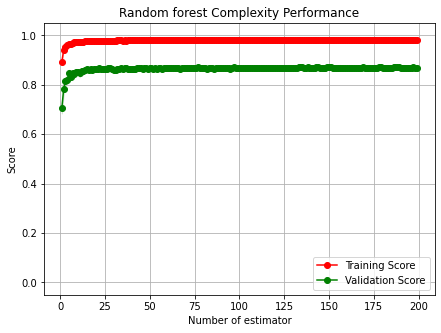

In [29]:
print(" Considering all features")
train_data, test_data, train_label, test_label = train_test_split(data_common, target)
ModelComplexity_random(train_data, train_label.values.ravel())

 Considering 9 features


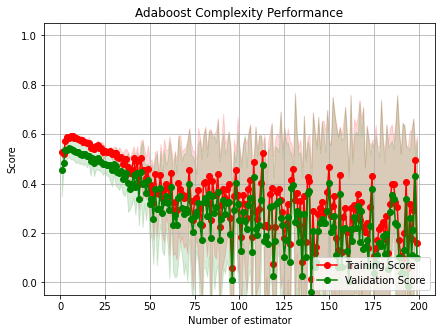

In [30]:
print(" Considering 9 features")
train_data, test_data, train_label, test_label = train_test_split(df, target)
ModelComplexity_adaboost(train_data, train_label.values.ravel())

Reference:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
* https://www.python-course.eu/Boosting.php
* https://towardsdatascience.com/boosting-and-adaboost-clearly-explained-856e21152d3e
* https://www.kaggle.com/sid321axn/house-price-prediction-gboosting-adaboost-etc